## Задания к теме 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

#### 1. Задание
Напишите код на Python, реализующий расчет длины вектора, заданного его координатами

In [2]:
def vector_len(X):
    return np.sqrt(sum([x * x for x in X]))

In [3]:
x1 = np.array([10, 10, 10])
x2 = np.array([0, 0, -10])

x = x1 + x2
x_len = vector_len(x)

print(x)
print(x_len)

[10 10  0]
14.142135623730951


#### 3. Задание
Напишите код на Python, реализующий построение графиков:
1. окружности,
2. эллипса,
3. гиперболы.

In [4]:
def plot_figure(X, Y, axis_lim, show=True):
    plt.xlabel('x')
    plt.ylabel('y(x)')
    lim = axis_lim + 0.1 * axis_lim
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.plot(X, Y)
    if show: plt.show()

**Окружность**

In [5]:
def circle(X, r):
    y = lambda x : np.sqrt(r**2 - x**2)
    return [y(x) for x in X] + [-y(x) for x in X]

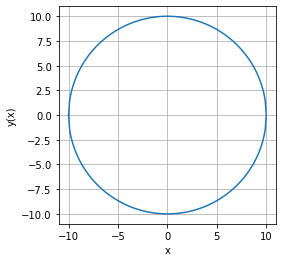

In [6]:
r = 10
X_ = np.linspace(-r, r, 201)
X = np.concatenate((X_, np.flip(X_)))
Y = circle(X_, r)
plot_figure(X, Y, r)

**Эллипс**

In [7]:
def ellipse(X, a, b):
    y = lambda x : np.sqrt(b**2 * (1 - x**2/a**2))
    return [y(x) for x in X] + [-y(x) for x in X]

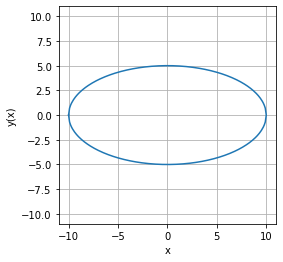

In [8]:
a = 10
b = 5
lim = max(a, b)
X_ = np.linspace(-lim, lim, 201)
X = np.concatenate((X_, np.flip(X_)))
Y = ellipse(X_, a, b)
plot_figure(X, Y, max(a, b))

**Гипербола**

In [9]:
def hyperbola(X, a, b, isPositive=True):
    y = lambda x : np.sqrt(b**2 * (1 + x**2/a**2))
    return [y(x) if isPositive else -y(x) for x in X]

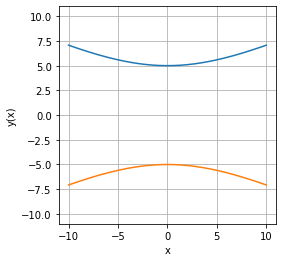

In [10]:
a = 10
b = 5
lim = max(a, b)
X_ = np.linspace(-lim, lim, 201)
X = np.concatenate((X_, np.flip(X_)))
Y_ = hyperbola(X_, a, b)
Y = hyperbola(X_, a, b, isPositive=False)
plot_figure(X_, Y_, max(a, b), show=False)
plt.plot(np.flip(X_), Y, max(a, b))
plt.show()

##### 5. Задание
1. Нарисуйте трехмерный график двух параллельных плоскостей.
2. Нарисуйте трехмерный график двух любых поверхностей второго порядка.

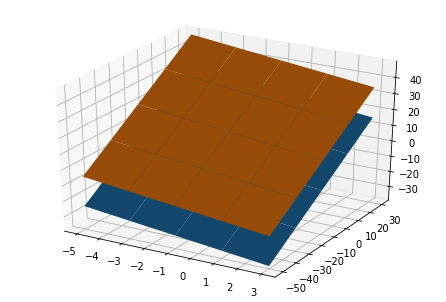

In [11]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)

X = np.arange(-5, 5, 2)
Y = np.arange(-50, 50, 20)

X, Y = np.meshgrid(X, Y)

Z1 = (-5*X + 2*Y) / 3 + 1
Z2 = (-5*X + 2*Y) / 3 + 20

ax.plot_surface(X, Y, Z1)
ax.plot_surface(X, Y, Z2)

show()

## Задания к теме 3

#### 1. Задание
Нарисуйте график функции: y(x) = k·cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

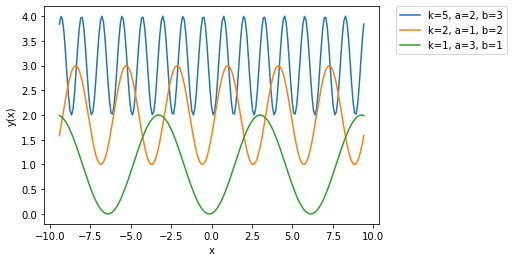

In [12]:
x = np.linspace(-np.pi * 3, np.pi * 3, 201)
params = [
    {"k":5, "a":2, "b":3},
    {"k":2, "a":1, "b":2},
    {"k":1, "a":3, "b":1},
]
for param in params:
    k = param["k"]
    a = param["a"]
    b = param["b"]
    plt.plot(x, np.cos(k*(x - a)) + b, label=f'k={k}, a={a}, b={b}')
    
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#### 3. Задание
1. Напишите код, который будет переводить полярные координаты в декартовы.
2. Напишите код, который будет рисовать график окружности в полярных
координатах.
3. Напишите код, который будет рисовать график отрезка прямой линии в
полярных координатах

In [13]:
def polar2dec(R, alpha):
    if R < 0:
        raise Exception("Sorry, R should be >= 0")
    if alpha < 0 or alpha >= 2 * np.pi:
        raise Exception("Sorry, alpha should be >= 0 and < 2*pi")
    x = R * np.cos(alpha)
    y = R * np.sin(alpha)
    return (x, y)

In [14]:
R = 10
for n in range(0, 8):
    alpha = n * 0.25 * np.pi
    print(f'R=10, alpha={n * 0.25}*pi, res={polar2dec(R, alpha)}')

R=10, alpha=0.0*pi, res=(10.0, 0.0)
R=10, alpha=0.25*pi, res=(7.0710678118654755, 7.0710678118654755)
R=10, alpha=0.5*pi, res=(6.123233995736766e-16, 10.0)
R=10, alpha=0.75*pi, res=(-7.071067811865475, 7.0710678118654755)
R=10, alpha=1.0*pi, res=(-10.0, 1.2246467991473533e-15)
R=10, alpha=1.25*pi, res=(-7.071067811865477, -7.071067811865475)
R=10, alpha=1.5*pi, res=(-1.8369701987210296e-15, -10.0)
R=10, alpha=1.75*pi, res=(7.071067811865474, -7.071067811865477)


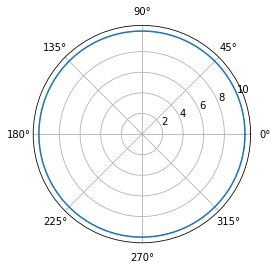

In [15]:
lim = 201
alpha = np.linspace(0, 2*np.pi, lim)
R = 10
plt.polar(alpha, [R] * lim)

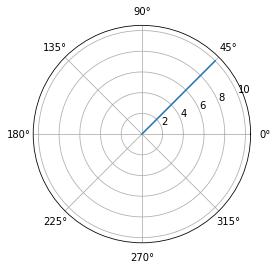

In [16]:
lim = 201
alpha = 0.25*np.pi
R = np.linspace(0, 10, lim)
plt.polar([alpha] * lim, R)

#### 4. Задание

1. Решите систему уравнений:

y = x**2 – 1,
exp(x) + x·(1 – y) = 1.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


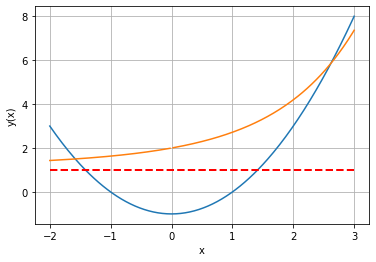

In [17]:
x = np.linspace(-2, 3, 201)
plt.plot(x, x**2 - 1)
plt.plot(x, (np.exp(x) + x - 1)/x)

plt.xlabel('x')
plt.ylabel('y(x)')
plt.plot([-2,3], [1, 1], color ='red', linewidth=2.0, linestyle ="--")
plt.grid(True)
plt.show()

In [18]:
from scipy.optimize import fsolve

def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x*(1 - y) - 1)

x1, y1 =  fsolve(equations, (-2, 2))
print (x1, y1)

x2, y2 =  fsolve(equations, (2, 6))
print (x2, y2)

-1.5818353528958982 1.5022030836712916
2.6181455730854304 5.854686241866794


Ответ: (-1.5818353528958982 1.5022030836712916), (2.6181455730854304 5.854686241866794)

2. Решите систему уравнений и неравенств:

y = x**2 – 1,
exp(x) + x·(1 – y) > 1.

In [19]:
def equations(p):
    x, y = p
    return (y - 1, np.exp(x) + x*(1 - y) - 1)
Ответ: (-1.5818353528958982 1.5022030836712916), (2.6181455730854304 5.854686241866794)
x1, y1 =  fsolve(equations, (-2, 2))
print (x1, y1)

SyntaxError: invalid syntax (<ipython-input-19-97f57e0b3c6a>, line 4)

Т.к. График exp(x) + x·(1 – y) - 1 = 0 не пересекает y=1, то любой х удовлетворяет второму неравенству. Ответ совпадает с предыдущим.

Ответ: (-1.5818353528958982 1.5022030836712916), (2.6181455730854304 5.854686241866794)